## <p style="color : peru;">Import Required Libraries</p> 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# import sklearn libraries for model building
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import pickle
import json

import warnings
warnings.filterwarnings('ignore')

## <p style="color:Peru;">Loading Dataset</p> 

In [3]:
df = pd.read_csv('../input/50-startups/50_Startups.csv')

In [4]:
# lets check the first five rows of dataset
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# summary statistics
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## <p style="color:green;">Data Description</p> 

The data collected from New York, California and Florida about 50 business Startups. The independent variables used in this dataset are R&D spending, Administration and Marketing Spending.<br>
The dependent variable is Profit.

## <p style="color:Peru;"> Exploratory Data Analysis</p> 

- Find Unwanted Columns
- Find Missing Values
- Find Features with one value
- Explore the Categorical Features
- Find Categorical Feature Distribution
- Relationship between Categorical Features and Label
- Explore the Numerical Features
- Find Discrete Numerical Features
- Relation between Discrete numerical Features and Labels
- Find Continous Numerical Features
- Distribution of Continous Numerical Features
- Relation between Continous numerical Features and Labels
- Find Outliers in numerical features
- Explore the Correlation between numerical features

**1. Find unwanted Columns**

There is no unwanted column present in given dataset to remove

**2. Find Missing Values**

In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

No missing value found

**3. Find Features with one value**

In [8]:
feature_values = {col:df[col].nunique() for col in df.columns}
feature_values

{'R&D Spend': 49,
 'Administration': 50,
 'Marketing Spend': 48,
 'State': 3,
 'Profit': 50}

No feature found with one value

**4. Explore the Categorical Features**

In [9]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['State']

Only one feature that is State is categorical and it has 3 unique values.

**5. Find Categorical Feature Distribution**

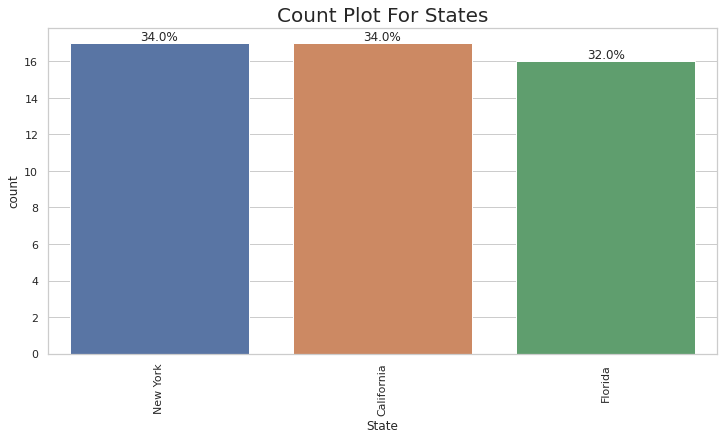

In [10]:
#check count based on categorical features
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
total = float(len(df))
ax = sns.countplot(x="State", data=df)
plt.xticks(rotation=90)
plt.title("Count Plot For States", fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center',va='bottom')
plt.show()

State with florida has less number of records in given dataset.

**6. Relationship between Categorical Features and Label**

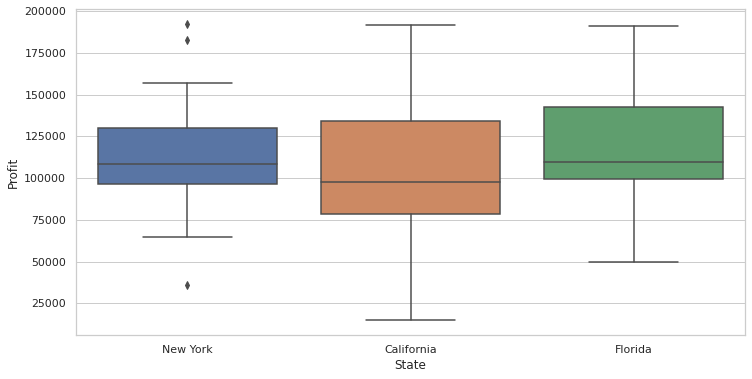

In [11]:
#Find out the relationship between categorical variable and dependent varaible
plt.figure(figsize=(12, 6))
fig = sns.boxplot(x='State', y="Profit", data=df.sort_values('Profit',ascending=False))
plt.show()

It seems startup in state of California has less profits than others two states.

**7. Explore the Numerical Features**

In [12]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Profit']))]
print('Numerical variables: ', numerical_features)

Numerical variables:  ['R&D Spend', 'Administration', 'Marketing Spend']


There are three numerical features that are R&D Spend, Administration and Marketing Spend.

**8. Find Discrete Numerical Features**

In [13]:
discrete_feature = [feature for feature in numerical_features if df[feature].nunique()<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


No discrete variable found

**9. Find Continous Numerical Features**

In [14]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_feature + ['Profit']]
continuous_features

['R&D Spend', 'Administration', 'Marketing Spend']

There are three continuous numerical features - 'R&D Spend', 'Administration', 'Marketing Spend'

**10. Distribution of Continous Numerical Features**

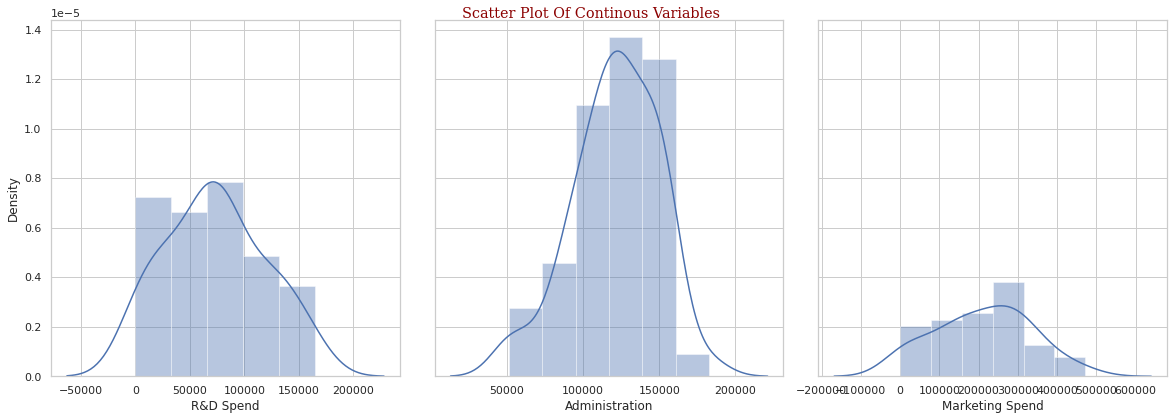

In [15]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
fig,axes = plt.subplots(1,3,figsize=(20,6),sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Scatter Plot Of Continous Variables', fontdict=font)
fig.subplots_adjust(top=0.95)

axes = axes.ravel()

for i,col in enumerate(continuous_features):
    #using log transformation
    sns.distplot(df[col],ax=axes[i])

it seems all continuous features are normally distributed.

**11. Relation between Continuous numerical Features and Labels**

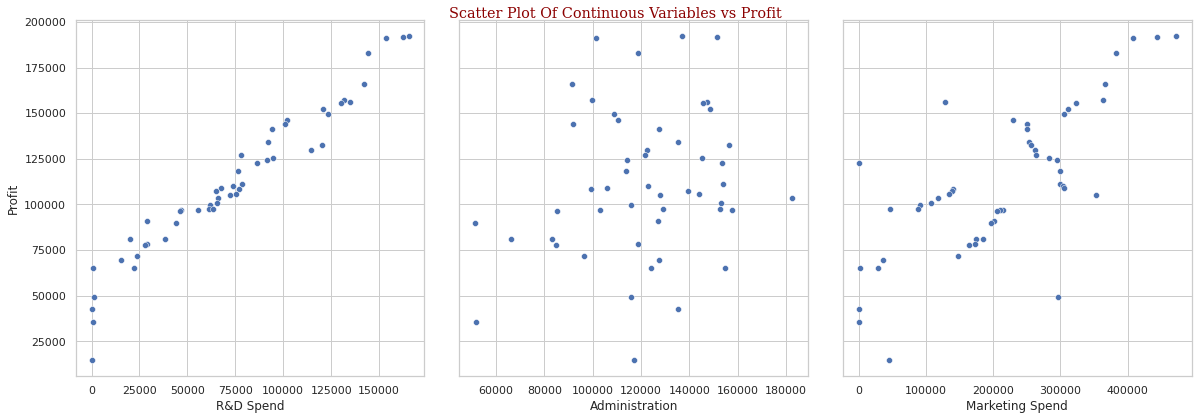

In [16]:
fig,axes = plt.subplots(1,3,figsize=(20,6),sharey=True)
fig.subplots_adjust(wspace=0.1, hspace=0.3)
fig.suptitle('Scatter Plot Of Continuous Variables vs Profit',fontdict=font)
fig.subplots_adjust(top=0.95)

axes = axes.ravel()

for i,col in enumerate(continuous_features):
    x = df[col]
    y = df['Profit']
    sns.scatterplot(x, y ,ax=axes[i])

it seems R&D Spend and Marketing Spend features linearly progressing with Profit.

**12. Find Outliers in numerical features**

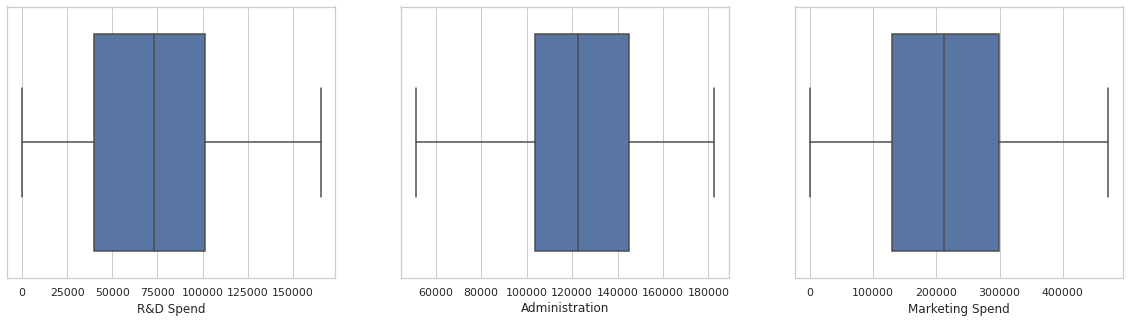

In [17]:
#boxplot on numerical features to find outliers
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
for variable, subplot in zip(numerical_features, ax.flatten()):
    sns.boxplot(df[variable], ax=subplot)

it seems no outliers found

**13. Explore the Correlation between numerical features**

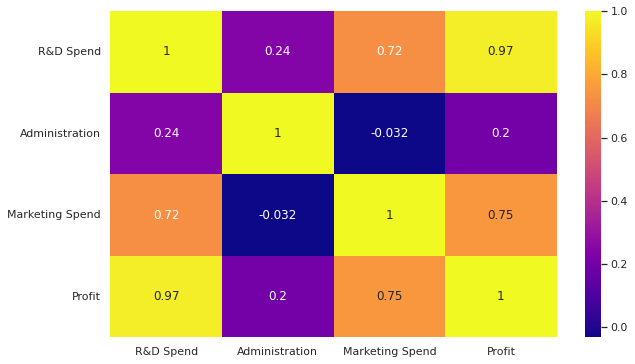

In [18]:
# Checking for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='plasma')
plt.show()

it seems R&D Spend and marketing spend is correlated.

## <p style="color:Peru;"> Feature Engineering</p> 

- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features
- Handle Feature Scalling
- Remove Outliers

**As per Exploratory Data Analysis EDA**, 
- these is no unwanted column present in given dataset to remove
- no missing value found
- only one feature that is State is categorical and it has 3 unique values
- it seems no outliers found

In [19]:
# Handling Categorical Features
df_state_dummies = pd.get_dummies(df['State'],prefix='state',drop_first=True)
# concat df and state dummies
df = pd.concat([df,df_state_dummies],axis=1)

In [20]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,state_Florida,state_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [21]:
# drop the original categorical columns
df.drop(['State'], axis=1, inplace=True)

In [22]:
# shape
df.shape

(50, 6)

## <p style="color:Peru;"> Model Selection</p> 

In [23]:
# Separate Dependent and Independent Variables
X = df.drop('Profit',axis=1)
y = df['Profit']

In [24]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

In [25]:
# Hyper parameter tuning
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'normalize': [True, False],
                'copy_X': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 400, num = 100)],
                'max_features': ['auto', 'sqrt'],
                'max_depth':[int(x) for x in np.linspace(10, 31, num = 11)],
                'min_samples_leaf':[1, 2]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=50)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
pd.set_option('display.max_colwidth', 100)
find_best_model_using_gridsearchcv(X,y)

## <p style="color:Peru;"> Model Building</p> 

In [ ]:
# Linear Regression
lr = LinearRegression(copy_X=True, fit_intercept=True, normalize=True)

In [ ]:
# fit the model
lr.fit(X_train,y_train)

In [ ]:
# check score on test data
lr.score(X_test,y_test)

In [ ]:
# predict on test data 
y_pred= lr.predict(X_test)

## <p style="color:Peru;"> Prediction</p> 

In [ ]:
def predict_profit(r_d_expenses,administration_expenses,marketing_expenses,state):    
    '''
    predict profit function takes four argument and 
    convert the data into the required format for prediction. 
    '''
    
    state_index = np.where(X.columns=='state_'+str(state))[0][0]

    x = np.zeros(len(X.columns))
    x[0] = r_d_expenses
    x[1] = administration_expenses
    x[2] = marketing_expenses
    if state_index >= 0:
        x[state_index] = 1

    return lr.predict([x])[0]

In [ ]:
# predict on random values 
predict_profit(55067.95,102077.25,212117.91,'New York')

## <p style="color:Peru;"> Save Model</p> 

In [ ]:
# save the model for future use 
pickle.dump(lr,open('startup_profit_prediction_lr_model.pkl','wb'))

In [ ]:
#save the data columns
columns = {'data_columns' : [col.lower() for col in X.columns]}

with open("columns.json","w") as f:
    f.write(json.dumps(columns))

![](http://t3.ftcdn.net/jpg/02/92/36/76/360_F_292367633_TwzHFo2XLSSbcihgxESm2sKcQ0NlwrIG.jpg)